## 구별 주유소 데이터 다운로드

In [53]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/kth/dev_ws/eda/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)

driver.get(url)

In [54]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [55]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [56]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [57]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [58]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [59]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [60]:
gu.send_keys(gu_names[15])

In [93]:
import os
from glob import glob

for file in glob("../data/지역_*"):
    os.remove(file)

len(glob("../data/지역_*"))

0

In [94]:
import time
from glob import glob
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    #driver.implicitly_wait(3)
    time.sleep(3)
    driver.refresh()

    save = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "btn_type6_ex_save")))
        
    #ActionChains(driver).move_to_element(save).perform()
    #driver.execute_script("arguments[0].click();", save)
    save.click()
    #save.send_keys(Keys.ENTER)

    while len(glob("../data/지역_*")) < (idx + 1):
        time.sleep(1)

len(glob("../data/지역_*"))

  0%|          | 0/25 [00:00<?, ?it/s]

25

## 구별 주유소 정보 합체

In [95]:
from glob import glob

file_list = glob("../data/지역_*")
print(len(file_list))
file_list

25


['../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (11).xls']

In [103]:
driver.close()

In [96]:
import pandas as pd

data = pd.read_excel(file_list[0], header=2)
data.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
10,서울특별시,한석주유소,서울 용산구 이촌로 164,SK에너지,02-790-1020,N,2502,2310,2192,-
11,서울특별시,서계주유소,서울 용산구 청파로 367 (청파동),GS칼텍스,02-706-6485,N,3301,2971,2940,2470


In [97]:
data_list = []

for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)

oil_data = pd.concat(data_list)
len(oil_data)

422

In [98]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      422 non-null    object
 1   상호      422 non-null    object
 2   주소      422 non-null    object
 3   상표      422 non-null    object
 4   전화번호    422 non-null    object
 5   셀프여부    422 non-null    object
 6   고급휘발유   422 non-null    object
 7   휘발유     422 non-null    int64 
 8   경유      422 non-null    int64 
 9   실내등유    422 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.3+ KB


In [99]:
oil_data = pd.DataFrame({"상호": oil_data["상호"],
                         "주소": oil_data["주소"],
                         "가격": oil_data["휘발유"],
                         "셀프": oil_data["셀프여부"],
                         "상표": oil_data["상표"],})

oil_data.tail()

,상호,주소,가격,셀프,상표
4,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135,1735,Y,GS칼텍스
5,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1754,N,HD현대오일뱅크
6,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1764,Y,HD현대오일뱅크
7,매일주유소,서울 동작구 상도로 139 (상도동),1799,Y,S-OIL
8,살피재주유소,서울 동작구 상도로 334,1895,N,SK에너지


In [100]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
417,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135,1735,Y,GS칼텍스
418,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1754,N,HD현대오일뱅크
419,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1764,Y,HD현대오일뱅크
420,매일주유소,서울 동작구 상도로 139 (상도동),1799,Y,S-OIL
421,살피재주유소,서울 동작구 상도로 334,1895,N,SK에너지


In [101]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,HD현대오일뱅크㈜직영 한남동주유소,서울 용산구 한남대로 204 (한남동),1961,N,HD현대오일뱅크,용산구
1,HD현대오일뱅크㈜직영 강변현대주유소,서울 용산구 원효로 9 (청암동),2079,N,HD현대오일뱅크,용산구
2,(주)영원 풍기주유소,서울 용산구 원효로 178 (원효로2가),2099,N,GS칼텍스,용산구
3,(주)남경주유소,서울 용산구 녹사평대로11길 24,2186,N,SK에너지,용산구
4,(주)신태성주유소,서울 용산구 원효로 147 (원효로3가),2189,N,SK에너지,용산구


In [102]:
oil_data["구"].unique(), len(oil_data["구"].unique())

(array(['용산구', '노원구', '강북구', '종로구', '중구', '동대문구', '은평구', '도봉구', '관악구',
        '서대문구', '광진구', '중랑구', '영등포구', '강동구', '성동구', '서초구', '금천구', '강서구',
        '송파구', '마포구', '구로구', '성북구', '강남구', '양천구', '동작구'], dtype=object),
 25)

In [104]:
oil_data["가격"] = oil_data["가격"].astype("float")

In [105]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      422 non-null    object 
 1   주소      422 non-null    object 
 2   가격      422 non-null    float64
 3   셀프      422 non-null    object 
 4   상표      422 non-null    object 
 5   구       422 non-null    object 
dtypes: float64(1), object(5)
memory usage: 19.9+ KB


In [106]:
oil_data

,상호,주소,가격,셀프,상표,구
0,HD현대오일뱅크㈜직영 한남동주유소,서울 용산구 한남대로 204 (한남동),1961.0,N,HD현대오일뱅크,용산구
1,HD현대오일뱅크㈜직영 강변현대주유소,서울 용산구 원효로 9 (청암동),2079.0,N,HD현대오일뱅크,용산구
2,(주)영원 풍기주유소,서울 용산구 원효로 178 (원효로2가),2099.0,N,GS칼텍스,용산구
3,(주)남경주유소,서울 용산구 녹사평대로11길 24,2186.0,N,SK에너지,용산구
4,(주)신태성주유소,서울 용산구 원효로 147 (원효로3가),2189.0,N,SK에너지,용산구
...,...,...,...,...,...,...
417,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135,1735.0,Y,GS칼텍스,동작구
418,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1754.0,N,HD현대오일뱅크,동작구
419,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1764.0,Y,HD현대오일뱅크,동작구
420,매일주유소,서울 동작구 상도로 139 (상도동),1799.0,Y,S-OIL,동작구


In [107]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,HD현대오일뱅크㈜직영 한남동주유소,서울 용산구 한남대로 204 (한남동),1961.0,N,HD현대오일뱅크,용산구
1,HD현대오일뱅크㈜직영 강변현대주유소,서울 용산구 원효로 9 (청암동),2079.0,N,HD현대오일뱅크,용산구
2,(주)영원 풍기주유소,서울 용산구 원효로 178 (원효로2가),2099.0,N,GS칼텍스,용산구
3,(주)남경주유소,서울 용산구 녹사평대로11길 24,2186.0,N,SK에너지,용산구
4,(주)신태성주유소,서울 용산구 원효로 147 (원효로3가),2189.0,N,SK에너지,용산구


## 데이터 시각화

<Axes: title={'center': '가격'}, xlabel='셀프'>

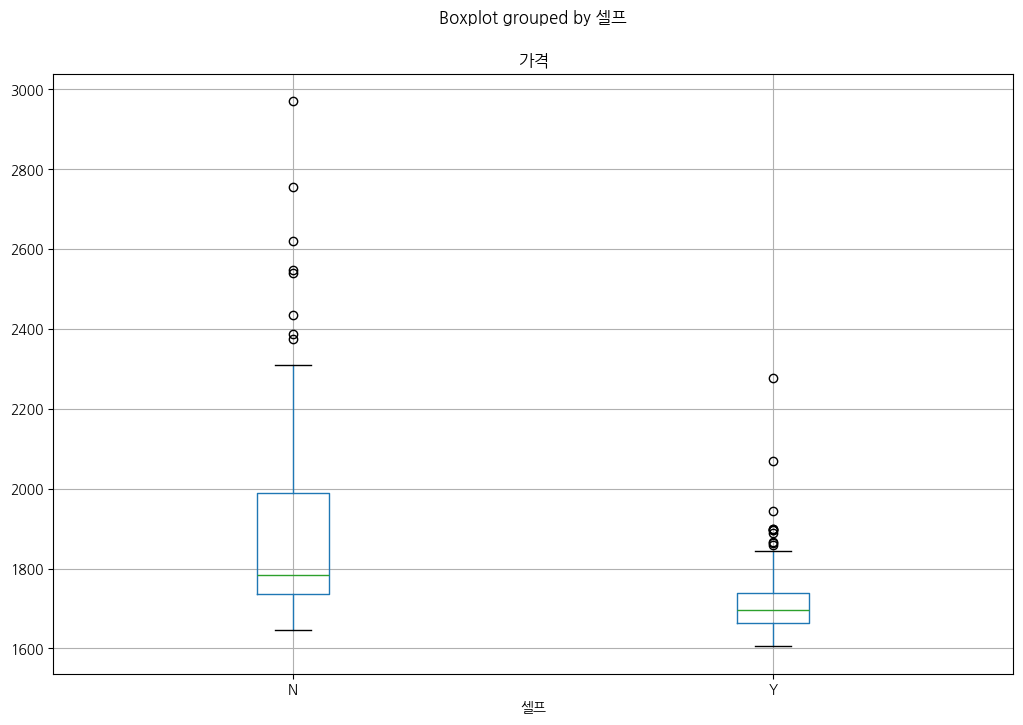

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

oil_data.boxplot(column="가격", by="셀프", figsize=(12,8))

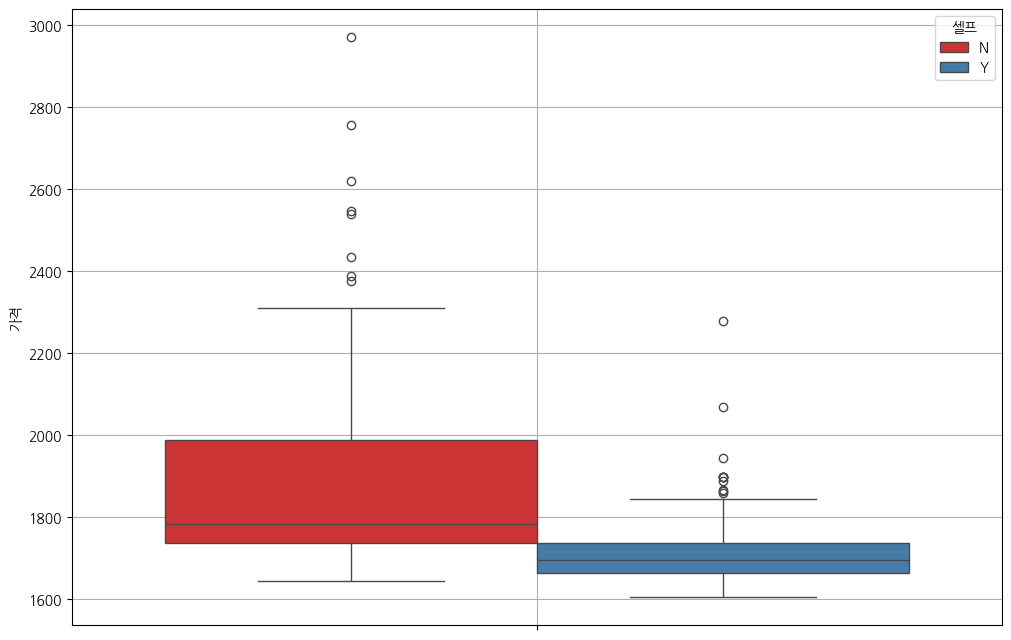

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(hue="셀프", y="가격", data=oil_data, palette="Set1")
plt.grid(True)
plt.show()

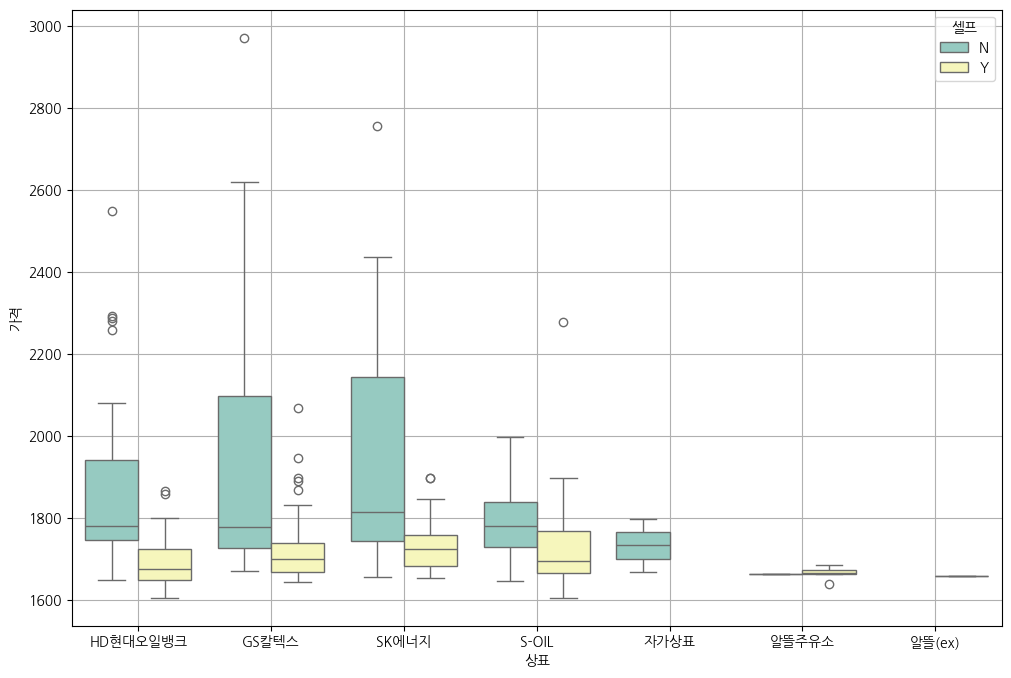

In [115]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_data, palette="Set3")
plt.grid(True)
plt.savefig("../data/seoul_oil_merch_graph.png")
plt.show()

## 지도 시각화

In [114]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [116]:
oil_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
11,서계주유소,서울 용산구 청파로 367 (청파동),2971.0,N,GS칼텍스,용산구
52,서남주유소,서울 중구 통일로 30,2756.0,N,SK에너지,중구
388,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2620.0,N,GS칼텍스,강남구
387,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2548.0,N,HD현대오일뱅크,강남구
51,필동주유소,서울 중구 퇴계로 196,2539.0,N,GS칼텍스,중구
386,SK논현주유소,서울 강남구 논현로 747 (논현동),2435.0,N,SK에너지,강남구
385,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2388.0,N,GS칼텍스,강남구
43,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65,2375.0,N,GS칼텍스,종로구
10,한석주유소,서울 용산구 이촌로 164,2310.0,N,SK에너지,용산구
202,(주)옥수하이웨이스테이션,서울 성동구 독서당로 168 (옥수동),2298.0,N,GS칼텍스,성동구


In [117]:
oil_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
188,㈜성동에너지,서울 성동구 천호대로 392,1605.0,Y,HD현대오일뱅크,성동구
187,(주)서울에너지 직영,서울 성동구 천호대로 324 (용답동),1605.0,Y,S-OIL,성동구
53,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1635.0,Y,HD현대오일뱅크,동대문구
246,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1638.0,Y,HD현대오일뱅크,강서구
245,화곡역주유소,서울 강서구 강서로 154 (화곡동),1638.0,Y,알뜰주유소,강서구
136,우림주유소,서울 중랑구 용마산로 487 (망우제3동),1643.0,Y,GS칼텍스,중랑구
336,㈜원천주유소,서울 성북구 돌곶이로 142,1643.0,Y,GS칼텍스,성북구
340,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1645.0,Y,GS칼텍스,성북구
337,신방주유소,서울 성북구 안암로 111 (안암동5가),1645.0,N,S-OIL,성북구
137,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1645.0,Y,HD현대오일뱅크,중랑구


In [118]:
import numpy as np

gu_data = pd.pivot_table(data=oil_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1959.000000
강동구,1797.461538
강북구,1675.300000
강서구,1717.878788
관악구,1770.142857


In [122]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="openStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                data=gu_data,
                columns=[gu_data.index, "가격"],
                key_on="feature.id",
                fill_color="PuRd")
setting.add_to(map)
map

In [119]:
oil_data.to_csv("../data/seoul_oil_data.csv", sep=",")

In [123]:
map.save("../data/seoul_oil_map.html")